<a href="https://colab.research.google.com/github/abdulahad0296/30-days-of-AI-ML-projects/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Day 01 - Titanic Survival Prediction (Logistic Regression vs Random Forest)**

**Objective:** Predict Titanic survivors using two different ML models and compare their performance.

**Models Used:** Logistic Regression, Random Forest Classifier

**Dataset Source:** Seaborn Titanic dataset

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### **Step 1: Load and Preprocess the Dataset**

In [6]:
# Load dataset
df = sns.load_dataset("titanic")

# Keep only relevant columns
df = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex', 'embarked']]

# Drop rows with missing values in selected columns
df.dropna(inplace=True)

# One-hot encode 'sex' and 'embarked' (drop_first to avoid dummy trap)
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Confirm final columns
print("Columns used:", df.columns.tolist())

Columns used: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embarked_Q', 'embarked_S']


## **Step 2: Train-Test Split**

In [7]:
# Features and labels
X = df.drop('survived', axis=1)
y = df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Step 3: Train Logistic Regression**

In [9]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

##**Step 4: Train Random Forest Classifier**

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

##**Step 5: Compare Model Accuracy**

In [11]:
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

print("\n=== Random Forest Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

=== Logistic Regression ===
Accuracy: 0.7902097902097902
Confusion Matrix:
 [[71  9]
 [21 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83        80
           1       0.82      0.67      0.74        63

    accuracy                           0.79       143
   macro avg       0.80      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143


=== Random Forest Classifier ===
Accuracy: 0.7972027972027972
Confusion Matrix:
 [[68 12]
 [17 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        80
           1       0.79      0.73      0.76        63

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



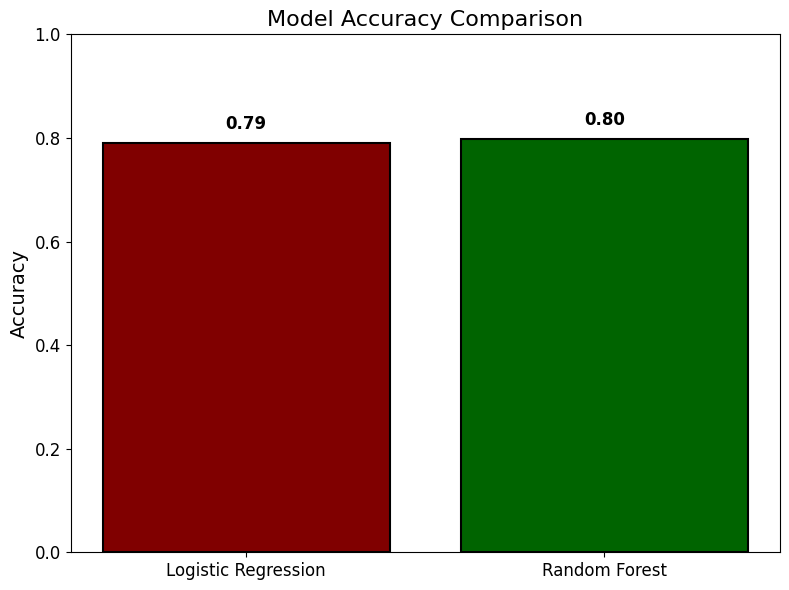

In [16]:

# Accuracy scores for Logistic Regression and Random Forest
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Models and their accuracy scores
models = ['Logistic Regression', 'Random Forest']
scores = [accuracy_logreg, accuracy_rf]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, scores, color=['#800000', '#006400'], edgecolor='black', linewidth=1.5)  # Maroon & Dark Green

# Add accuracy values above the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize plot
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy scale
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save and show the plot
plt.savefig('preview.png')  # Saves the plot as preview.png
plt.show()

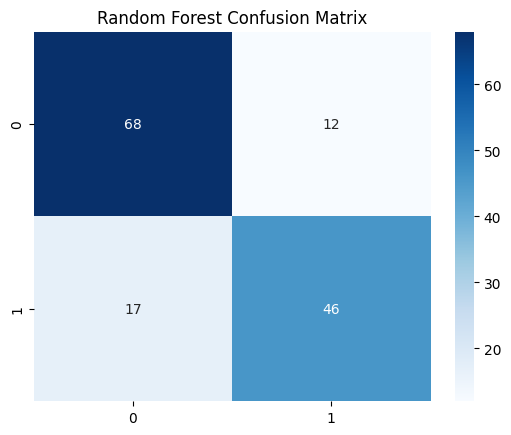

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.savefig('preview.png')  # Saves image for GitHub
plt.show()